In [2]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

In [3]:
def moving_mape(y_true, predictions):
    if len(y_true) != len(predictions):
        raise ValueError('Shape mismatch')
    moving_metric = [mean_absolute_percentage_error(y_true[:i], predictions[:i]) for i in range(len(predictions))]

    return np.array(moving_metric)

def plot_predictions(y_true, predictions, save_name = None, time_ticks = None):
    if len(y_true) != len(predictions):
        raise ValueError('Shape mismatch')

    if time_ticks is None:
        time_ticks = np.arange(len(y_true))

    plt.plot(time_ticks, y_true, color = 'blue', label = 'true values')
    plt.plot(time_ticks, predictions, color = 'orange', label = 'predicted values')
    plt.legend()
    plt.show()

    if save_name is not None:
        plt.savefig(save_name, dpi = 300)

In [ ]:
a = np.random.randn(100)
b = np.random.randn(100)

#plot_predictions(a,b)

In [10]:
from sklearn.neural_network import MLPRegressor
import pandas as pd
from os import path

PATH = r'C:\Users\Никита\SSA\data'
ts = pd.read_csv(path.join(PATH, 'beer_production.csv'))['Monthly beer production'].to_numpy()

In [ ]:
def make_ts_set(ts,dim):
    x = np.vstack([ts[i:dim+i] for i in range(len(ts)-dim)])
    y = ts[dim:]
    return x,y


def validate_model(model, ts,M, dim):

    ts_train, ts_test = ts[:-M], ts[-M:]

    x_train, y_train = make_ts_set(ts_train, dim = dim)
    x_test, y_test = make_ts_set(ts[-M-dim:], dim = dim)


    model.fit(x_train, y_train)
    predictions = []
    ts_new = ts.copy()
    for i in range(M):
        prediction = model.predict(ts_new[-M-dim+i:-M+i].reshape(1,-1))
        ts_new[-M+i] = prediction

        predictions.append(prediction)
    r2 = r2_score(ts_test, predictions)
    mape = mean_absolute_percentage_error(ts_test, predictions)

    return r2, mape, np.array(predictions), ts_test

R2: 0.3259635501300818
MAPE: 0.09626312828930975


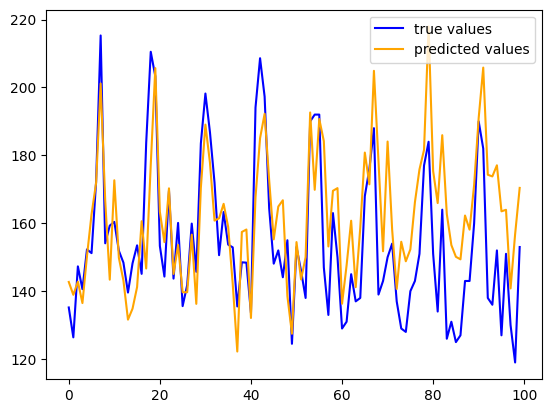

In [ ]:
import warnings

warnings.filterwarnings("ignore")

model = MLPRegressor((20,20), activation = 'relu', solver = 'adam', learning_rate = 'constant', max_iter = 10**4)

r2, mape, predictions, test = validate_model(model, ts, M = 100, dim = 100)
print('R2:',r2)
print('MAPE:', mape)

plot_predictions(test, predictions)

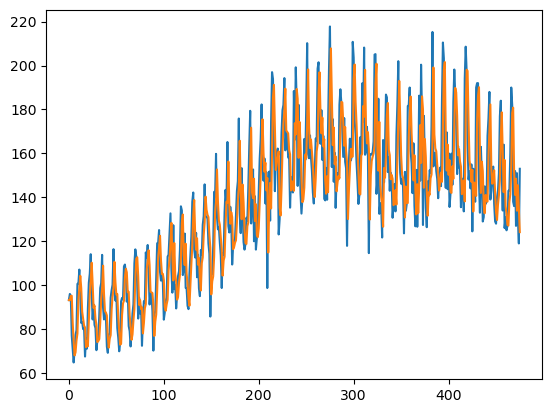

In [19]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

smoother = SimpleExpSmoothing(ts)
#new_ts = smoother.fit(smoothing_level = 0.1, optimized = False,).fittedvalues
new_ts = smoother.fit().fittedvalues
plt.plot(ts)
plt.plot(new_ts);

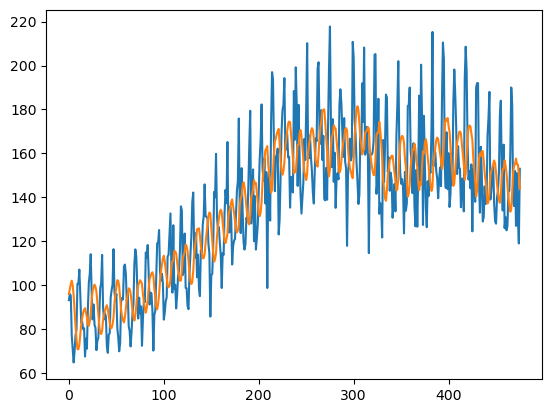

In [25]:
smoother = Holt(ts)
new_ts = smoother.fit(smoothing_level = 0.1, smoothing_trend = 0.7, optimized= False).fittedvalues

plt.plot(ts)
plt.plot(new_ts);

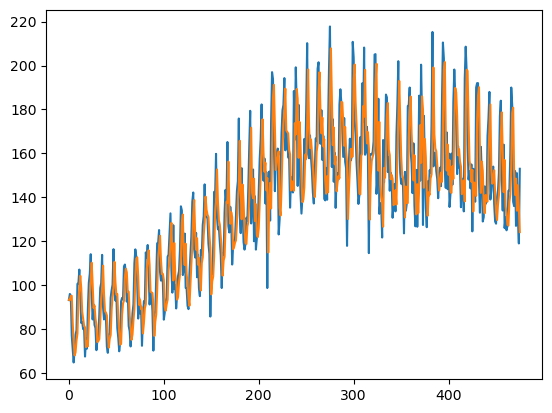

In [26]:
smoother = ExponentialSmoothing(ts)
new_ts = smoother.fit().fittedvalues

plt.plot(ts)
plt.plot(new_ts);